Ссылка на туториал: https://t-redactyl.io/blog/2015/11/object-oriented-programming-in-python-for-a-non-object-oriented-programmer.html

# Синтаксис классов

Давайте объявим класс `Cat`:

In [1]:
class Cat():
    def __init__(self, breed, color, age):
       self.breed = breed
       self.color = color
       self.age = age

    def meow(self):
       print(f'Мяу! {self.breed}')
   

Наша кошка имеет параметры (**поля**) породы, цвета, возраста и имеет **метод** `meow`. 

**Метод** `__init__` — конструктор класса. Он вызывается сразу после создания объекта, чтобы присваивать значения полям класса. `self` — ссылка на текущий объект, она даёт доступ к атрибутам и методам, с которыми вы работаете.
Теперь чтобы создать объект типа `Cat`, нам нужно всего лишь

In [2]:
first_cat = Cat('Абиссинская', 'Рыжая', 4)

In [3]:
type(first_cat)

__main__.Cat

In [4]:
first_cat.age = 5

In [5]:
first_cat.age

5

In [6]:
first_cat.meow()

Мяу! Абиссинская


Cоздав объект, мы можем посмотреть на поля класса и вызвать его методы:

In [7]:
first_cat.meow()
a = first_cat.breed #без круглых скобок! это поле
type(a)

Мяу! Абиссинская


str

In [8]:
first_cat.name

AttributeError: 'Cat' object has no attribute 'name'

**Инкапсуляция** - разделение элементов абстракции, определяющих её структуру и поведение; инкапсуляция предназначена для изоляции свойств или механизмов абстракции от их реализации.

Инкапсуляция в Python реализована так. Мы можем задавать **приватные** поля класса, доступ к которым хотим ограничить, написав перед названием поля, прямой доступ к которому мы хотим закрыть извне, два нижних подчеркивания:

In [19]:
class Cat():
    def __init__(self, breed, color, age):
        self.__breed = breed
        self.color = color
    self.__age = age

    def get_breed(self):
        return self.__breed

    def get_color(self):
        return self.__color
    
    def get_age(self):
        return self.__age
  
    def set_age(self, new_age):
        if new_age > self.__age:
            self.__age = new_age
                  return self.__age

NameError: name 'age' is not defined

In [11]:
first_cat = Cat(1, 2, 3)
#print(first_cat.__breed)
first_cat.get_breed()

AttributeError: 'Cat' object has no attribute 'get_breed'

Что подразумевает, что нормальный человек не будет обращаться к полю, название которого начинается с двух нижних подчеркиваний. Такие условности. Чтобы все-таки получить доступ к **значениям** этих полей, мы реализовали **геттеры** (def get_smth()). А чтобы безопасно менять возраст, не нарушая логику (кошка не может молодеть), мы реализовали **сеттер** (def set_smth()) для возраста. Вот зачем нужны **приватные** поля. 

C **методами** можно делать аналогично -- написав два нижних подчеркивания в начале названия метода, мы сделаем его недоступным для вызова извне класса.

# Перегрузка операторов

Концепция **полиморфизма** означает использование методов или операторов с одним и тем же обозначением к разным классам. Так, плюс может использоваться для сложения чисел, а может для конкатенации строк. Для каждого создаваемого класса мы можем переопределять базовые операторы (**перегружать** их) при помощи так называемых магических методов (англ. dunder methods):

| Оператора | Метод | Выражение |
|----------|----------|----------|		
|Сложение +	| \__add__(self, other) |	a1 + a2|
|Вычитание -|	\__sub__(self, other)|	a1 - a2|
|Умножение \* |	\__mul__(self, other)|	a1 \* a2|
|Матричное умножение	|\__matmul__(self,other)	|a1 @ a2 |
|Деление /|	\__truediv(self, other)|	a1 / a2 (Python 3)|
|Целочисленное деление //|	\__floordiv__(self, other)|	a1 // a2|
|Остаток|	\__mod__(self, other)|	a1 % a2|
|Степень|	\__pow__(self, other[, modulo])|	a1 ** a2|
|Побитовый сдвиг влево <<|	\__lshift__(self, other)|	a1 << a2|
|Побитовый сдвиг вправо >>|	\__rshift__(self, other)|	a1 >> a2|
|Побитовое сложение &|	\__add__(self, other)|	a1 & a2|
|Побитовое исключающее ИЛИ ^|	\__xor__(self, other)|	a1 ^ a2|
|Побитовое | ИЛИ	\__or__(self, other)|	a1|a2|
|Унарный -|	\__neg__(self)|	-a1|
|Унарный +|	\__pos__(self)|	+a1|
|Побитовое НЕ ~|	\__invert__(self)|	~a1|
|Меньше чем <|	\__lt__(self, other)|	a1 < a2|
|Меньше или равно <=|	\__le__(self, other)|	a1 <= a2|
|Равно ==|	\__eq__(self, other)|	a1 == a2|
|Не равно >=|	\__ne__(self, other)|	a1 != a2|
|Больше чем >|	\__gt__(self, other)|	a1 > a2|
|Больше или равно =>|	\__ge__(self, other)|	a1 >= a2|
|Индекс [index]|	\__getitem__(self, index)|	a1[index]|
|Оператор in	| \__contains__(self, other)|	a2 in a2|
|Вызов функции (*args, ...)	| \__call__(self, *args, \**kwargs) |	a1(*args, \**kwargs)|

Каждый из методов, соответствующих бинарным операторам имеет соответствующий «правильный» метод , который начать с \__r , например \__radd__. Что он означает? Давайте рассмотрим на примере:

In [26]:
class A:
    def __init__(self, a):
        self.a = a
    
    def __add__(self, other):
        return self.a + other
    
    def __radd__(self, other):
        print("radd")
        return other - self.aБ
    
    
print(A(1) + 2)
print(2 + A(1))

3
radd
1


То есть `radd` вызывается, когда наш объект находится справа от знака сложения. Зачем это нужно? Например вы хотите написать класс `Vector`. Вы хотите, чтобы `Vector(...) + num` означало прибавление num ко всем координатам вектора, а запись `num + Vector(...)` запретить, потому что она плохо читаемая (понять, что значит к числу прибавить вектор сложнее, чем вектор к числу, да). Перегрузка одновременно `__add__` и `__radd__` позволяет вам это сделать.


Помимо базовых операторов мы можем переопределять многие встроенные функции. Особенно полезные случаи приведены ниже.

| Оператор | Метод | Выражение |
|----------|----------|----------|
|Конвертация в int	|\__int__(self)|	int(a1)|
|Модуль	|\__abs__(self)|	abs(a1)|
|Конвертация в str	|\__str__(self)|	str(a1)|
|Конвертация в bool	|\__nonzero__(self)|	bool(a1)|
|Взятие хеша	|\__hash__(self)|	hash(a1)|
|Длина	|\__len__(self)|	len(a1)|
|Округление	|\__round__(self)|	round(a1)|

# Наследование

Часто многие классы могут иметь общие свойства (поля и методы), описание которых не имеет смысла повторять в описании каждого отдельного класса. Например, мы знаем, что все хищники умеют охотиться:

In [76]:
class Predator():
  def __init__(self, name):
    print(f"I was born")
    self.name = name
    
  def hunt(self):
    #pass
    print(f'кродеться... {self.name}')

In [77]:
zz = Predator('aa')

I was born


In [78]:
zz.hunt()

кродеться... aa


А кошка, как известно, хищник. Так что сделаем класс `Cat` наследником класса `Predator`:

In [79]:
class Cat(Predator):
    
    def __init__(self, name):
       super().__init__(name) 
        
    def nnnname(self):
        return f'my name is Vasya but you called me {self.name}'

    

Мы можем проверить, что кошка умеет охотиться:

In [ ]:
"""


  def name(self):
    return self._name

  def color(self):
    return self._color
"""

In [80]:
predator_cat = Cat('Петя')

I was born


In [81]:
predator_cat.nnnname()

'my name is Vasya but you called me Петя'

In [75]:
predator_cat

In [52]:
cat = Cat('Бегемот', 'Чёрный')
cat.hunt()

I was born
кродеться...


А что за интересный `super()`, который мы использовали в конструкторе класса? `super()` это обращение к родительскому классу. То есть мы как бы доопределили конструктор хищника (который мы оставили пустым, поскольку не аписали его отдельно в классе `Predator`), добавив к нему какие-то новые операции при конструировании класса `Cat`. Таким образом мы можем **доопределять** методы, объявленные в родительском классе, а также обращаться к полям родительского класса.

**Надо запомнить**, что существует три типа полей и методов: private, protected и public. 
- **Private** методы недоступны для доступа как в классах-наследниках, так и извне (тем не менее, они все-еще существуют в той части класса-наследника, которая содержит данные класса-родителя). Чтобы сделать поле или метод private, нужно перед его названием поставить два нижних подчеркивания (мы это уже демонстрировали выше).
- **Protected** поля недоступны извне класса, но могут быть доступны в классах-наследниках. Чтобы сделать поле или метод protected, нужно перед его названием поставить одно нижнее подчеркивание.
- **Public** поля доступны свободно везде. Все поля, не обозначенные как private или protected, являются public.


## Множественное наследование
У класса может быть несколько родителей. Чтобы сделать класс-потомок от нескольких родителей, нужно перечислить их через запятую в скобках после названия класса:

In [82]:
class A:
    def method_a(self):
        print("Method A")
 
class B:
    def method_b(self):
        print("Method B")
 
class C(A, B):
    pass
 
c = C()
c.method_a()
c.method_b()

Method A
Method B


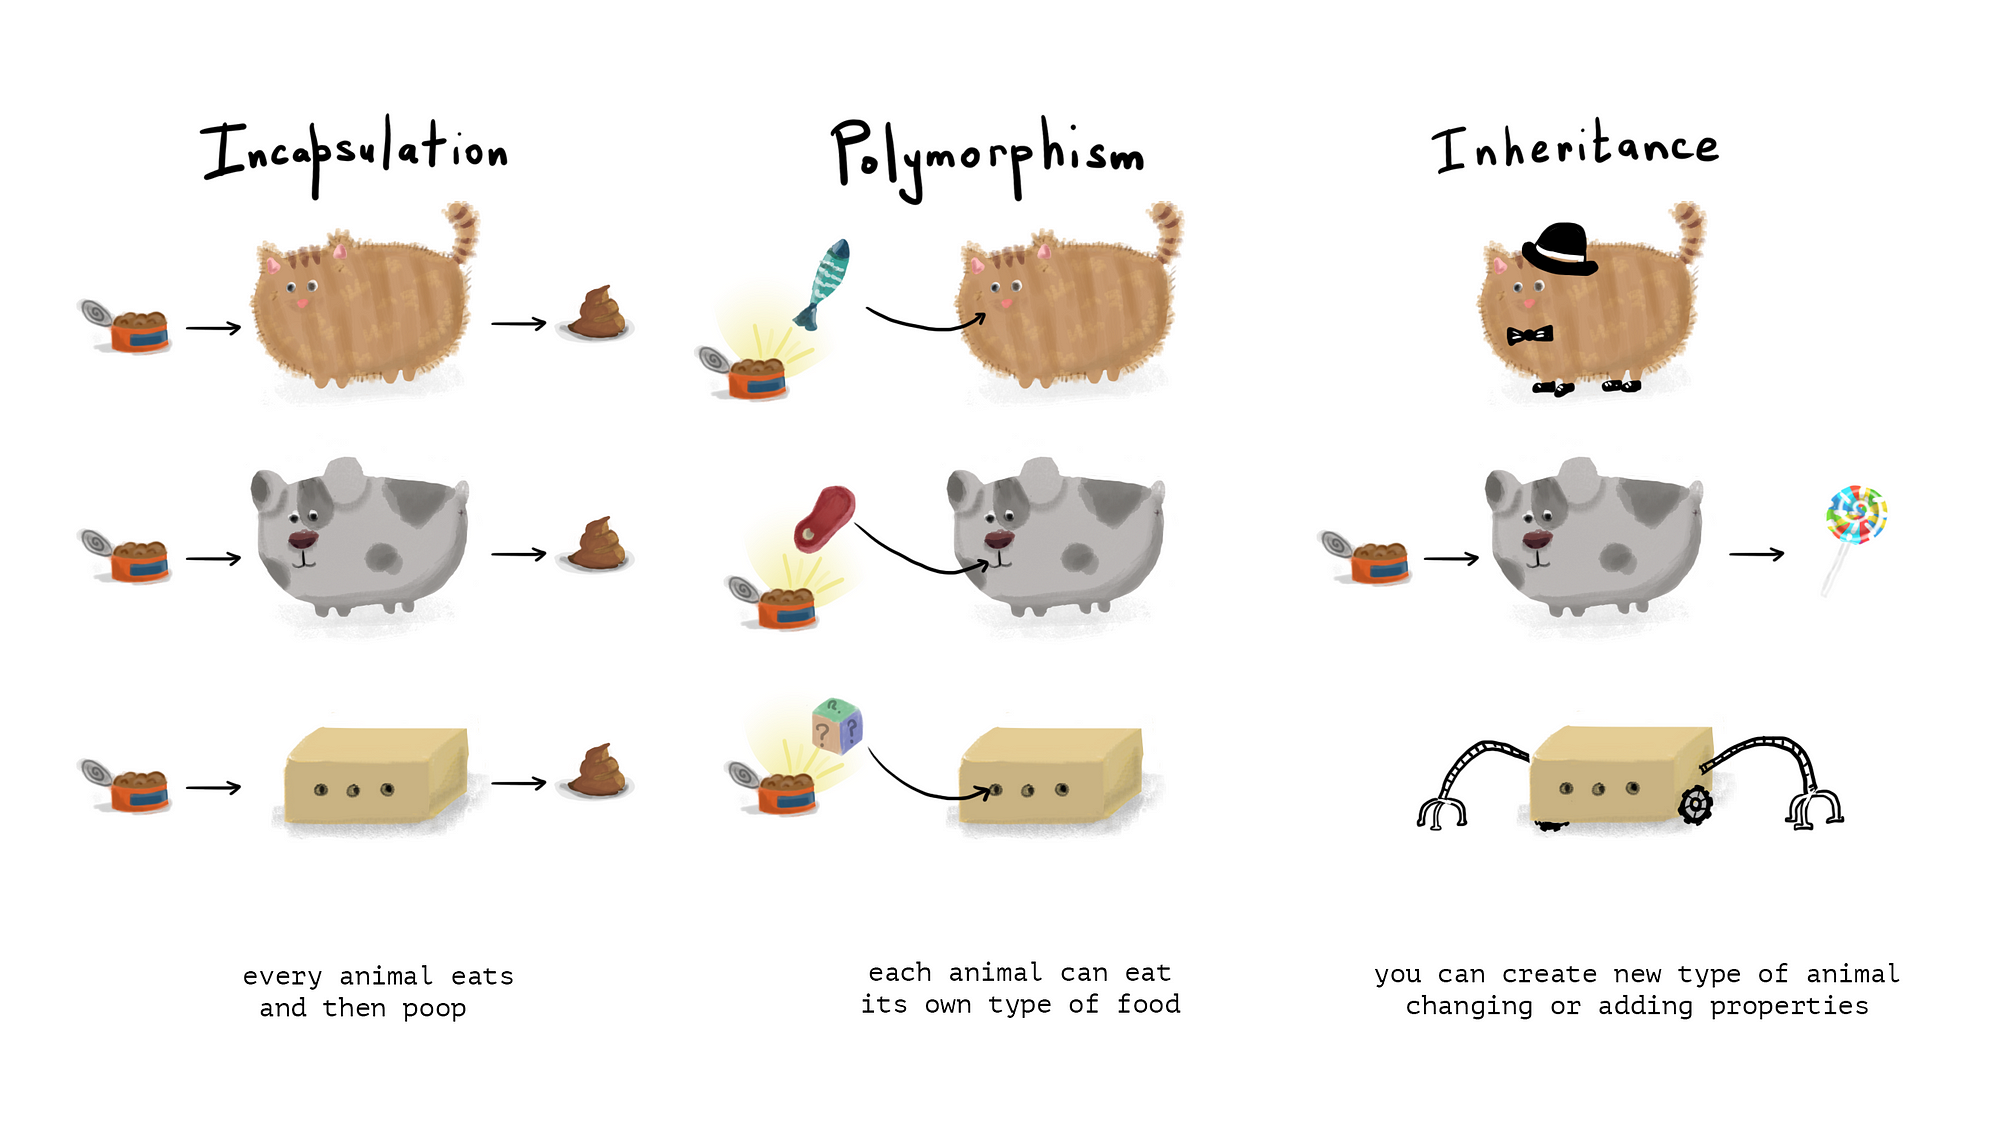
[Source](https://cakeinpanic.medium.com/%D0%B8%D0%BD%D0%BA%D0%B0%D0%BF%D1%81%D1%83%D0%BB%D1%8F%D1%86%D0%B8%D1%8F-%D0%BF%D0%BE%D0%BB%D0%B8%D0%BC%D0%BE%D1%80%D1%84%D0%B8%D0%B7%D0%BC-%D0%BD%D0%B0%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5-166591e5928e)

### 

Упражнение №1
Создайте класс Vector с полями x, y, z, определите для него конструктор, метод \__abs__ (модуль), необходимые арифметические операции:
- сложение + 
- вычитание -
- \* как скалярное произведение [вектор с вектором]
- \* на число [вектор и число])
Реализуйте конструктор, который принимает строку в формате {x, y, z}. Учтите, что в векторе могут лежать только числа (сделайте assert на то, что x,y,z это числа). 

In [58]:
class Vector():
    def __init__(self, x, y, z):
        assert type(x)==type(y) == type(z) == type(2.0) or type(x)==type(y) == type(z) == type(2)
        self.x = x
        self.y = y
        self.z = z

    def _abs_(self):
        return (self.x**2 + self.y**2 + self.z**2)**0.5

    def __add__(self, other):
        return Vector(self.x + other.x, self.y+other.y, self.z+ other.z)

    def  __sub__(self, other):
        return Vector(self.x - other.x, self.y-other.y, self.z - other.z)
        
    def coor_vector(self):
        print('(', self.x, self.y, self.z, ')')

    def skal_pr(self, other1):
        return Vector(other1.x*self.x, other1.y*self.y, other1.z*self.z)

    def vector_pr_digit(self, other):
        return Vector(other*self.x, other*self.y, other*self.z)

    def make_vector(coord):
        return Vector(float(coord[1]), float(coord[4]), float(coord[7]))

a = Vector(1, 0, 0)
b = Vector(0, 1, 0)
print((a + b).coor_vector())
print(Vector.vector_pr_digit(b, 2).coor_vector())
print(Vector.make_vector('{1, 0, 0}').coor_vector())
print(a._abs_())

( 1 1 0 )
None
( 0 2 0 )
None
( 1.0 0.0 0.0 )
None
1.0


### Упражнение №1.1
Используя класс Vector выведите координаты центра масс данного множества точек.

In [34]:
n = int(input('amount of dots'))
a = Vector(0, 0, 0)
for i in range(n):
    m = Vector.make_vector(str(input()))
    a += m
print(Vector.vector_pr_digit(a, 1/n).coor_vector())

amount of dots 2
 {1, 1, 1}
 {3, 3, 3}


( 2.0 2.0 2.0 )
None


### Упражнение №1.2
Среди данных точек найдите три точки, образующие треугольник с наибольшей площадью. Выведите данную площадь.

In [55]:
n = int(input('amount of dots'))
m = []
pl = []
for i in range(n):
    z = Vector.make_vector(str(input()))
    m.append(z)
for i1 in m:
    for i2 in m:
        for i3 in m:
            if i1!=i2!=i3:
                a = (i2 - i1)._abs_()
                b = (i3 - i2)._abs_()
                c = (i1 - i3)._abs_()
                p = (a+b+c)/2
                pl.append(((p-a)*(p-b)*(p-c)*p))

print(max(pl)**0.5)

amount of dots 3
 {0, 0, 0}
 {1, 0, 0}
 {0, 1, 0}


0.4999999999999998


# Программист-детектив

В оставшееся время нам с вами предстоит поиграть в детективов. Есть некоторый написанный код, в котором вам предстоит разобраться и сделать его работающим. 

## Упражнение 2. Пушка

Перед вами obfuscated (забагованный) код в питоне. По-простому говоря, зашифрованный. Вы не можете видеть, что он делает, однако все равно можете его запустить. Попробуйте это сделать. 

In [ ]:
import zlib, base64
exec(zlib.decompress(base64.b64decode('eJwkmsdyg2y2Ref9FD3rv4quJqchIHLOYUbOIHJ4+ivXLc9kW0J85+y9lq12/M7r/u93aLP/ZulWEti/yrvM//l74H9Fmc/jdy237Z///97/MgL7e7Ao//lPqVz9SEbmBT+Ecx54e0zj8F6pjd3Dq7/5mExJgIIP4dlfvo62swCn0N+RcRRL+ESrjAZ6EEK8Nf841R2gfYW+NOWBVKtmzdTv+4FUIAru1TOaYIckAghSX5w7s5bRZkgubw5X2zEHU6xdq/MNkPD9xJS03wf2Yl07kIKlJzEr3oxvahVBSqU7seqE1gpjl5IxMjcfBAz5sLF0rfw8twLIVIYLoXxuM2ofoNxsz7WWsD4/0HTqQOzV8pRLj83ovy4cArWiEukZmzleWARZEnxtIcmd6QVjGPU9SaClxqXJUC+POCs+v+Bi93lI41cU34KBqVxhMf1MlU08eestMF1XfrAq6cgEFamzN2ABTGjoWmk605fY6++tohPbKZ58unDTsCgIOw1P0KThW2SXRoANLAWtLJhcxzVTIDPDnaBRsz2nCvGWMrocdPJ9vuT9/YWnoUq/a2r1EHnfOS0jvvhZDPGsg9/pryUezo5/4fzQhs0RFfPVP0X0jLiYbBq9pFzRXj6S0VcOMq/q1m25GJxkvisRrcryoTiNxtiPLXY94ZpiqNiHDi8m41Ofwdgh8ruwWUz0lvwpA5iqCXjXsl5CcN4QOWMZZOC7xsncVpU/IcLqxGFmH3ZvePMKB/mY3kQNh2bgu++8uX4xD0t/AW1yv9U5Q725ayoeYa83i+hRukEVerOMQufYUAAnVbMaEXPmlM83o7096hUlLzr0VYZXHjry2YKlz+COPmnVhD8dvAADmc4iWyQ+sb4hiUKUzRXxweLM4DpLITS+w1MS72LFHhdTp7onMekP0SjuWihoQPV99zkuokaSF/YrGFPDJaz6NBQOGOO7m3hYDz4H+bN5N9QBRnLytv6b76WtxPRukNtLIG2oomJJDdPwW8+HgXPPc2TwvPZAH3VGFXNid+dLwkbK3/C1c+RxO/3k9oc5dLaOBXwak5TQTuM3qVGt17d6j0PFnf0Nhy2f6suvBrydg1v+vSRBW4pZWKC1p13yYR7fJnpDPpLseZQ5Yu6g2vHMyB9ymJBQ/swWTd3LtKSEjqLnvgUpqaTPlmeki+cwq4FLDwCFzUWcDYbf54OI6umoW+uddbwrgQYtjiT2vhA4Uf9gIPWh02xbNeJcGROIen+uJL4+BxzHqX0qEDuDuNYYSZOEHPI+WW+jGO4h5QyDjoayyM5IEgNy4kflvMRw1OdmIVkZGknH7F3SDVhvy2NjugKM2KpOvbjOQ8VyyQ+ixYfp6NaYnztjrSAdrDzf9IGFbDbuCVHPMfwmgsWkSl8QlJnKV95gIH1VzQaIy9YkH/tryFOGtRyVOAZLyN78xr+nGJcTOk6xmRQC4iNPz+QZunBcHKwprbcyviseDlFq01GHgjsC9lk/PlJ4MBybh6tdcefclPWl3LeHGuuMnd89JHWDud8ors7q4J+ZPLRcvSM7ZOT23ixBidotLLNtmszfwO9AAAHip/KBHdP7TzcX+TEz6NO9O4ux35r0JcIPKVAvjb5oW60H0pjFU5Kjm+U3Hlj4VgRb3lgUGrImuVOSi0IUEL66C4z6PdcdYD/+LaJ3soWngrlb4e6HW2tAQGysh6o0LmkweBmnlhl03ow5SywJc3eZEJSfPv1+7HFqnGmjVJCurEHUGH3RnRP5JY4JhNKMo3OLbgSAjazm9baIRp9LIva1NyUBEjIZuLbdytRhiLolRHGP32hZztjWiwWBvuoKeW0Ob0948aOLRBFd7JlyQfjv0FKB5pSofx5cPr0zdPuyTg+wpTN8RFCZllheOQWvDhMIauoO7Bj89Jpw0j0pVvZTNiYoZyieL3GShvw9fjzs6QsU3wOmmhcbtkLohJ67h7mXLbI2+jFRx7vah0iuh7jJy60M5ECBRS38WJjKgy9ieA+tklgWjJp7J9JN3hA65xOBbAHYlS4wOiYJTNoPhGi5wwD0JigZitYxxcDpfgpC6eEkxXc53OKdrDTSH23ZSeNoABlAAETjDcIBHMe2TOx3r8zWp/3sMY/CiPg5F0SOe4tNGir7LcnDZZe0P3CPrB2kb4rdH8eXGJRRUa1TWnAOcAtJmCQcaE2feAbobg6G0xK6qtnb5g0yjVjCVCxtoOgU6v2a1Apl8cwM757FCFkJ/TgwKpeM6aph9MsziwpmVJc+g6XTDG1Z4ZFRMDRiWXTnA5Iko37M0HoAt39JwTk9kLsDlcxEs15p/SHqjD1VGhfAAx8HNf5e28c6D+W+uVB/qqOERXaSnnis8xfnnvQ3yXz5APgUCY+rUlHXqrkkfdAOeXeHTmczAhkpt15Lw9tP+jS2caWOetm+rpLQyy12SzZqc+3yaYMwCnO/CAdzPSLUoPsYXXqztK7rjxPF3TaNo79Ue5wkW5yS1lGkKx6Dd4GpL1iy7NesWhKHRkAtAt+b3K72AzigAXEA0IERHVmpdU6U9LyZVFMbrz6Irup0frW7HtStAjlOayoGV69hOr0J4YzSUfkU2yx7vIUJPWU6l6f6CMKHNAI30vPnk4FZqdJcJC4ftbjJnJT0jVVFxi2hBkNrJPhMsfTGJUx3LoG1TyZ2y8Z95yC7UnfL8oTXwQNkH63uue3KIuWlgKgxmt1445rYgZz8oiPWIAeFnlMkt0AvkD9GAWWnAxrvBNu4O37AyB6xRtD8pKkp20prBgbVaAAUxYJYa02IlDFss+oqDk7k5rMfeOxaQd+2h9+65qQIizvvDErz3czWVFvDauW9u8pf74zXdf3hpWIFOPgN9ORLrZGcwYSiVDdwMJYGSDWBwAOFTSRhzEPEivQ6/0gBhep5aMVcaDRGFqgk5BGcGtuzbhGnoposGFSdDc/UjARvE0LuK2pOThExImQ2K9nldvwOBzJAiF4B7RvNFi9/ipR9hNRP2+kySne43bVMP9yosiP5+p3B51xyAWB3VAWDJbjVnfpXEASoGQlbzFE2PgM2x5Z0SyeKvFpJTCl4XqP8hw15iVBAbrUZRfP8uWuliIYf6g4LH6oQZvjVVvF8LtPfdwPu1xQc9rcoJibVhz3tlvyORqAe5l1FDTlfvl+qaPIcTC40F5HRsj3u022I+YGX4hviqDxczDOIYcV82+mg6hZwhjsnRNRztyhs6+YLozWN9nGQe3tnhyyHjL5COtuXhTDvO2qtUebmMjvLWJZ+RONLWJNHU3lqmz7tcF/87gvwp8mB19CO/iDd4IF2cpfa666Gsg0u11jKxvxmn7TCZhsQiC4ofF/BPO7AUU7g1BiN3R47dxpDKq+DoqMkf0e3iys4wqY0LorXM1M32uqUC0dlillNNktkOa1xVkEXyUt1p2R8T8RateYWza9kZMVTugfzuyzpng0bCe5vM05E56Ci84HgckiBflS/1hpmgC2GXX8DJcA/ck9wD2eoXKjWX2yDK+XDBt1JFGsaAaxLSRqK9ZaaQ3eiBtLBK0FTn4xZsXc9NWvHfeQB0+V6wY7g9Hp5DDGgLKhFRHkDR/Qs1/0g7QVncnPY+0mYN7WzBDP8iAfZV1eU5kpCWHr12CUjee6Iy5wk5wC7l9VOX1tqoN/R9tfFQeaOQKEPYT9zGz7MRzzI14XCqF2/CImOwA/q9DIZE5v1WcwVBbXqfmMsEgNRP0+BfINDEsdSZaQGEh8DuNI3zZ5Sqb2WNkw7Xvt3122f5hn441vR9haSsw+OoHZZb/r8Pf6ehwkcrfMdIdrLErXIvYB4cxU3K9Aag6t3qKAY3fMHBu7asG+gW4I7denG+9PO3HPRShr+mPTNRKa5qvBAq/gOtk3drJspcY3+MZv1UAZz2ZuirGrlfZGVqmhiwsZavyIdsZIrEdCHw9xFaMVixtmTivuEiy3W36jhBe2dbuEIaz97QYvhQlBdHAAe3JkTbyFvU2RJYciVLW/qHsNrWPbeN1vxd56xJoC8W1DjYzS/eR8Juob3k5JM5Dc00Xqw8M5xeCD+vl8kt5S6v+l5rfSZmsDYyWPSnK5mhN3TqkRJyj+B7CQDbSl46XFQhu4vKRa1YORuRSgJJajObNmNnXWhm8vJHiWcyWHnOHkmedEfF8r0fpO+nS/EJuZt2+JjB8IcTiS5DCHATdT1q99+EbPXdibgsKE37vi7f5gylU591OQIV4E2rrLivrUaxwUa+2lzeaAXM4y/ATcocpZOUF0I5YM9RCpNU1whz8KKv/OKzHgvebT1wx2/oPZ3EssFb8g4cTSKXV9leY/5S8wFJk4S5l+h8Jqb9OHoJJ6C7PP5fmMhM90drtk29ZO0YopubqwetVYjfmmsLeiZczKRbgb41x9CTq8NLNzSjcmNPKln8dkN1CYxlQap5gYK7dvPn9cKqfOYiYy0n/1CQehWa0D96h+sGEK0qF7+08oBYIhfgZKX8wYtkxi3Zs/fM+sVHrcqFUB3/FNHD0XmTHTkvUx/2PT7fZdIxJAQHnG19EyGuZCAQE0Afmru22oP+HsXiSiQutc0SJ0Yx6Q6nO7UXzj66CiYoOuHPKwK4/oGaxks++RH96BGx+jCdtvB1L9BpKpayTAHBnmE8os1wBvJ8K4L6/P8ltY32w1IV5Y48bSM3hsb9OQpLkwau+BQvb40vxa/bIwBvIR+Cqzs7icOVzoCf+nm3seylyfBi/WC/5BXX1GXu2vdK1F4fhwCutX6qLThoqLjWJMjx4vyr/yHX5/vlgIriKV5/tl1Fzlz72llUb6O5Oq+BVf8nOvCwCD2m3bk5IkMBXVujFp5V/qLWPLWQRnFeCoAYBWXcMe4H3QnJngXMrECDcrSFNw3M4p2zyCbNmqBFLaOFvHC2Wlc9m4z0rYBCQw18vPQXUxWrqkmX8FzWqQZA5RRDJQrAkskmrOfd4sTgKDGjzCixK7UGj4R4JfFBswMg/wTz7gL8LxIqTAwGQFe5Ow5YhtskJ5uGNwkZ/LCZZGruS20DIBU8hyrSgMVOESAoDjxwo88F/b1U8ex3JMf4B19eiCJ505l5z5RCFG2vK8MdeXnLHVrpbGVi/gcxJeYJTePMEHfbRZg1Rq7p5wI3lF+uSwRNdXKtFF9IZFjOGoEWfljw0tnRUiq9ifoPEFgI2OLV7ETJrd2UP7A5QposdgxRPhPydmPVXUOK/Kkvv2WYCOrGREVFV9UuGbALK+SyZlNlcCI2yW05LnW9dN9Lp2CxBpo8R/lWC88fzp0TYDLuAjq80vkGhqu7hWJLkJmZLm1UHkn2UkXRIQpeNkU9BsSh+2PSLPd3vFbZ53NLF8y9ohViAWraw3SHId58oX3VQhAaW8C7Q5xMqsFvUuxBkh240UPgqCrYCUqJpp98n5srfSM/ej2E9BomTXTROb3srs1o3et24k1oM7xDIUiN9YhwbJLeuYylDnGDh2LhDcgD/xOg1KDxOB2VA19oMmeqpCRVZaK6HE6p7erwUzh1u2G7kBxqrPr5+3vxvHxz19syEPyz5jDLkk+tX2a+OkwHUOKW9tVy0EuEWDAKGVkKeYOzIPIYMknLDQD8etlyFerO3KiREenxc2Z1IQ6QAmZWB+RAvodeZtr5hOey0yaHiEcHtTWGg+YNIHbjJES+t/ujCDoZm0F6fGjixIRviU+AaiWsL/Qf5hbLjaZG2XPiucjxHvbpOMcl2XPaZC1Imx0oKODUOxPm9AYG/Pu3WpZZAj8Abs2jQKm2CzCmFeHXVbTChKN9nP8zwJJ3PGpNJF8pJoUs0FNRcH7RMjRS5Ss/H7fRBG+/s6YSc/FNN5lbMLU3tqkp8rN4n7s/NCa75ehY5rIVVG7JAQnZ6VIz9AUyRPk9drU2VkaUQ1goQv5usLn3Wrg9G53NEh+DeGO9xpt09RKkssR0R8rprYC5Lmp/HG71WXdjf80vbdtABxONxfjoolwtJJfazuLUll+QV0DxdUz29PpFKang2gPmHDNjMp9lPnOBEAzeqeoj7aKAmu0vJPLElA6NKWzlKX/eL9YdU2m1ogN/dHAtlTwjhE2j4LH408qO6XrcWYNcyYZuHMkpkkb/jvepcAUYN3Bwh1a99b3SjzqE3CiZh5KnCjV/fC6rZ4OhH4NMmInhfPuQDU6rD2yGPWh4Xxi8PignEdQuhtoU+aoTbkkhejKXiZeFJwszm/1TgfRJKlhHSK80S60xsnql+A8lYPWcpEMXQGQn26dDWzgif3TLVexuAZ3a/1j+55botN8RnRtWrYhs5f0xYSxEdODOcI0fG9i3L9npW4mafGFuGgFxHDSRypoPhu94R5ygWh/VIgzzvqpL3lwydegyk56Hsbud45bD/JjAhzKNEnlOsuajJiUol6vda5Du46zTgNa+/OATN4cdzWRNIhdYcH62/PJ9qhvVjqPueXixUgS8WsNquKANWnrddlKHvPWAiRdzJ/AbKlhcH5OZXJu3uFeM7b11sT681FDAdOHARoV/0bTKBz36Y59pU5ppeK/QTSQKfYWvy8GTph7Lw0TofWtar2XLskBLTXNz6m6KHT129KUY1QZk4hjXKnrjbNUx3l1rUIhhW3s91w5vUlpIYDBfrbkaz2WjZbhbELFz/ByXlynbnmbXzgO1m1tHE/pRdtbQDsHXEwr8lEF/ImkzPmlhGn8pBsdT10nlDftp4/VSKLajwxN95NQVfij7kaAjtUhPePSSEx7bL3oQV4Lbim7Wp6FfbsWeUZyXjInWVuDSJF4v0/X8lpWVTD1Uwdaq6nIklwdmLvBLO95QYBukK0hu/jLr1npQ8UWrhto1UJkqveQWvl85UcnAaJ27YW4/9KrNRnkA7GmSziwCVKhpljVREtj5CcT46WY/sgN8LkyLIsLk+/lbzGwv2UplljLBhnXLQUKQ0HgDAdYYtazJMNBYQH0rc83Jvx210sWIgRd6nGlLKAE7asjmPiNIiXFkXDMw9fMLcMJ8eE87Ldzc8VJLei0Ea4YCE7UES4ZW6DMaI74se3USEkU3M2+0jvEDfZQHz6IebdPMrlLQbIaqFIY9mxIjnyZECemmy3RAkvFE3JC1Hv5oZLbEU/KUNxrNIW075VQmX4GOq5j+kUT7QOu+FwnWItWPjiY4g9prlzgbRyWPjaOPCSQaOBBanLlpxN4k1+LHsPskh3G0tHtEZ3psMaXWFi0fQR+T7hfc9Hwha0MDRDE4tzfG0kOu1MzrePc84swdMmCX0DTtWn8RVkjnRMJNUmQkbJ9VkjLs0xecvxaiVs+v+GSPUPSCgp0UlZ3eBiugO1VPu4Kb4MIKCVas924M/kmZdARIRBQnbjA3FYofBMnEtVMtdJvk1mJyL3itBdbWrx3rglxFWhhgoCuF9ItaxjHNQLi9uEzgnT3g0TpzHx5HKnK452ncsNWA/jAQFLSl6CQFNtQkQ9FHAXJh7kayRSsb5O8nhiMlzaioNNZfskdCPDdA6BIBL47KCHdKVu8HevhBL3+yQc0/0ZHZk/1EsSU944bSgOyI241zRqhlgEWbxpf1Vz0VLf3mMb36MSWR1iyfb5QiZkRp4vwQcECVnMhtOcuUciDjbbFbYkSwxDzWY+XuCrAcAhOzMcwAdJJKrTPuaHzXOdsKu/1+cVm4VlasGhG8Ya/Rnrm7TXscigJUcis38JWwVyTMlpAMpLnNe8TfI1v2S5gDvq1020rf5HSRs72CQ3LmU6V5n1pSew4X4eLy8J4pwsrIi78lgfBPtuza3n2w8r9r6T41jtXpd5XHsQhmGY2XXIKfpW/kj/YANeiOkZ2GA4cTPZZyivtXkp0ke9jzTJQ2YgrcYO9UNaqbMS77mpzZFpNgSYDN2sCdeaF9oRgGYZaYigERNnH1fxQ25MNshuCuauStnt7pFgOXfv21c4qYoJfzEQDgiA8RzmCrhsE72Z3K5VMHwGJubXFD9tMeqIGva+BTNr8335gYoSoA1IgDZAFE4M7a73qNyAmky3Em6UGzmfRsdewZbHQ+5+0DeVurqElEiHcziCOavhDOlMoBYIWyHHpQY3gt0hDXvyasbE4PfTzQP4PxXE4Z5BxJj9UxGa8rLvDWmjnWDiPJntDBjDfXxfz1D1afZ5AOF9beElPYYajyr5N1aJ+fQQBMzV0dIWVDkH4RdzQYCoGvWQxach1Y9512S65X9meho7HaZ8Lh6Qw/9Zmg5ZYCYTttuaYGe7JvZWhsET9j/HBdJjvn0yrVLc8wC828uD4QHLWexoDH6b+NZ7vQPEgVy/G8uSzTU/oXNfGTz4L40Uw7jTcq3Io/pwEYNahkaOuHuNgEO1U/INlRBKCYtQDhu2LwzcT7M/ShhYnIMDlSJnvI5Wx7Mw8XtH4c50ZT9dHmqCIfvPvy5RS7I7oJxLFUGMJcPfvwc1QUtPlEsuMTVYMBv7UuOC5xjzGMX+oK3zGqv3ICa+A1RUiW6TdtBXs/Y57qb8fsPLl2Kkr70Q8Gyix50qA5rWNQpq8sFyyvGAQBydULr1aWOrVlymLfE6Yao2DgZ3nCx8NsQ9yEmY+xzqjPZELbsNtzUwbfUbltWaY8OzJAa6obJm0AoDwGBs6tmKAGWuC4JxyKGHUNyLS+gntr4EYNCDy5tlwEcTlw/I2sp4uaILIgzQh9ytaQiT4PB3EsTpXicSGQNF/QYq30fn2mkfzzBtwvqx6foVoj2cfgqwJ/MKnjsF42NVGBxc4olUJLVI+fOPFewVk/fxWSo7M330Z6p39zlxaWmhD1Xb3PdFmqK3p7OSLCQZUYTDe8tc9Le5o8zKTLIxtsVDNiTCwMahq9geg0EjCuyoJGgF4ZIHfuJSbPV3LVhnQBIAZBQmIKSopJOLhvmYkKCs/N9eu7SfbXNvaCgzEgSP5pMvSkNqGradUmhXnJhxdZijFnDb0GhQRnbPAG7SG0qPH59k6ucY7KSYeBlOhHKzIQH7CzK/ZqFjly1BqoBq1UKmVIRfJ3m+p10eIFtkJPRkY5yj2TTmjySXQNJy6WcSHj/UZ8tsYgGG1QfELjYaR9lUA+PS3L1Uw95BEQP94D59/w/zhjs4wiHNLyWj/Pthl/bpLLxDgh4LBgYngSTafn595avMDCMZO3C98wSZA+5hP5mAVgkDJ4C+xWSFu9WVQF3M/y9n0Y/PaHdubAyxSaKfN48Xuoxr1Un+gVAgTXXcccH0/qV6ERIBTesgjBDS+W6JjlmIj+s/Ncr7idlWLod/0H+AW/7RhYMvCS7O7cj6tzQ5+lu+CC5rfT/0RJEj0FJqloiD+2DP8Si/zWw7J8OeHyeQsAGxB5IwT/fvvSKpoqJElgldWhT4HbdqgztJkFyzrOG5lgohPFnM0zs9+90Ltb+50WirsYMzQxcLTv+/55HpXaUhHKN9HhtFliqbEVHcFT69MrL5bQ4hWk8kAOuMfv+3h4HPiXsK5xbfnQHlMn24Ql3vK91cZfbrpyGMvUXXK6KPofqEIWR6/Nx8oiFmjAwHAhMHcS+wnK9r0OfXITcv2nEVa8cYy8G0tjGGMGjs1cDHqjH65L1bBXiUprghjQDLlejgjG9xno3QwEIbwalr+dVQuJMXQjJB73DBjs+sAIgeSjl/Nxw2tg5KCKlVBCv5yzvTNwZL7kYy3Ej/4rw4GZEyctknLBGWawQCP+y7P8PMkud01Y5OMiLslsSIud2rIG4b7m4ZEeSXxOdeptDq+1eazwIcJKHezzDOEPOK6b9MfF5clZgrJipHRIlwueLw/PvQbDu3PgFjqA/j2BykUZXB/MUGpL7/AU1qGycm/mv2aXwtxfzS4XGbHVrBSY5fDZ7qkW78lEZ2OYlixoyTtG9GN+ZMMBhbs0gSLuhsO4FZLqoXih57sw/xFzvkj9Y85gzNrSujVEtHEKGkNvyroH934TUlk8ByrxhXn/TDMIPV1laaFx2A62m3IJPm08+QAUSlto5RN9Tz4/Gs3U5h3u9++YAXQ6xe3CisQwlsXtNnsgD3ATVCESAiJsumah73DHBrGzJXCF3e8ql+mCuKEYrJyIj0RNXfzNgc/2Q5Ij3Id1Phyd/dliwwCoiiDbsqdBIskMpiBRjlX+0ro8ulDrHZljTD+6b0wAKT8DNzPrLNPasnYRV5hPrYkI0BJ9oFI32CY1H/xyIdZMbO0uL8vlF9prRPWKQrVQbHtuWd2k6jLjyn9fVoCVjbHCFdTzF4lYhEbyIUZB9VeW6tpfRgwpcApW7oVal3pJbInS12i17gAapmopUMcfKyyRhAVULvyXd0UD07lpNQ5Ogw7R0UPkzM4HEhPcdJDBkAsn5hB9sFXx00WCysOYlleSdITx3phXxXBvM44LkniO6g73T3Og3KdnWLjVaTOzCm/s0uPzBitwrEiWo4+X7/botQ5Psogz9I9zau+pGDPMkbeYDK3boCIHlS9v3g9/Z4B7ykyVOhgfKw1bpH0vExJq+QabSKwiV6WMrfrnduOpr7vlUo66TEf+RMMrZV9htWsMzyocp7etZ2mTtsL6EVORBV6+CHVI+YKutBbDhvZroQbjeOcf4EgluqWJCiad72bs2Iusdcsao08fgySxg+Oc9uKo5e6cS26ycNQs3GAfD0OFpei41Yv3D84XcFoc1hpeJ1vUb83leeOPpO37J/xrDBWZuRL/mFqzlthtfU1/01ZGykaTSHK6XF2sUQDY0HoQxC376YvufaLntwr6V/5CWI5mxliTY8offyZrKEF9nsPWAm9XsOxqz2kIHr28ASCG7TE22Ka6qRG7dqE66OZwp2qwP0z8u5M53GaPpzwxwgSIBjJkIn0bvp6t8mconPs22escYDymYHWx9OQM+i+wwHpxXCNFnXyKHT4oN58NFX29+gzl+pshdFxf3+1RG2QVS7j901KKSK/MWJJMl+Wmbqw1b5tZqKceRFxn18Gs22I3MIUJVU6knuefyEfRQyoBFPhVoJFNh8iC6Jw151bVecD12lSedoW4DfQ4v8+d9fzrbyiFt8x0lcVeLxgEjWO+7aPj91AbF4hxwOBfpe+ZL0lQPaHRNPfucDHPbzltQek+xvUPZyolkvodko6jeU18bicqsmGI0lp/i6Bx2ASR7JBDlSbFu88xyPRA8lnBzAl2tiZAEka+KVRcbEkzWMHFzvAQuapaixDRS+SBgAEVHWm1gEgUVW9Y3R+u0HAHIYFFkdufTsQGH9oos9vWvIywLDOz0e60OAo/JJYBx7VWNENek0Pdkp/LRhx78FjksdIieR++uHcCV+ZAOFsCSWpW+mJlGeoLxQOJFx1z4LOZBeap0u6QRLnOAI7FYumTCwzM4iac/lkaTsqlpydHbrleYiDaIQWyIW1galjSdfKjcbIq1gjEQNtAZ3A4uP7U1T70oIRHRON4yJGf7BTdUOdKK+2yTykJdWTpYAPxvCcmakZNQjjMe4vcN+QUgfH17MtGumQn7djYbqoHb9LeZnMfPcy4UYfOnyamFm9kPQl2Suy9pvlFNyiYPPI/YtdHHI6MFeak/eydPmb9w9sYrHd2sPZgggeW/62NKyveAiYdipZU6zd71ErkR9Jqasz/K60Einu+EDT8yGr6ZE4dqGG0JVZlsIJ1m0Sw/+UgSlOM4tI8nUfEsqDRYS4OgfbCaiGBbjWh8/bGkpIdKUuTwKryP6F1C72FM9CMU1o5OTD8hQG2qQRmzSvcWhHZpntqCoF95vygMBhxgosfuM7MH9arOv5anMX3tiHOi6xuSt/nwWFaPoUZ7xMvOk3QFhfluhwfPwXPJ0XLiKiBsHsq1w26kn+tseW9MGgbxFNkLc/dv4r2NSLJfWuRsu8+SkqMdl2+BgRTckl8NxGq2Uzyx4mqY6kVtrb/3RDvMn1lfnWc1XXdSY90cIvGHnZ4JkAACxa7+Xtwya6fJNQ1mKZmHbcOebma6wniK/JU/FRXmFAzElqfpzjqtgMPNKtXqBZmZRQO8P3fuFLZvgMV9d6clnH/XHb/ovAMuIDj5YhCTIxfbsvsf99AH4psZxTQcHB6jdZyvjsP8vHIFIT4eZ17ibuqR6Afnt1NNaxWdlcdkzi+rhB27K58z26Xr5v7MaI4hUC+ghz6o0pw8dEx67i3qCv3Yy+omHbp9/nsCkYyhcS+M8Po9yAKVDSPk4IVx/vHQbPQrozpFzkTpwets/opQa6YaHWvM1SlSrxUqAcOiY3yrdGE3998AtrajXlfOqsphtRk4Kkg/EKenwIbk/h1frN/UAAAgQ0QpYnn73FUC27exJyfhAjf3cX33tUgqMAB57j6iGycOkw/PI7v8hjpNYoxi4ja9bFvvyejPl6HCPVmtG42TlqGEYJ21CoM2vzRPBwNKuZ9rQIehw8fIgE5BXg1i1xxWjK2T7yQVncufuBGSIzGKslTvSD/WyvaPLd7pbvW8WEM0PFAYqdNrR46aZvWvr9MOulNb1eLKgPLXn4e1/ZNjYA6wJ28n7I3yUqRXZznNBmn9NR+lDx3hSiEOBTfuk12LYnlD3DhYNO3EUgWHPtu44KKzqTmGaXDODIZzhUpcWEAPgI/tbnQ60CBqHwl67HyapoSViJ5VOReveLfwQNH3DAo0vBmg2sDl2Imtn7ERCKUHz1LlrmfN+4lcqYyhZ6pIcdYiUP4b+XqaLbScdk+xO3nXItYJOjo4c6DNdtmMZEhdzaqW4YC1G5pMyACmYUDSenDr+O9H7o6lM9P1axzdoEcJ4WUb+haCCLwnGUKI6eIyxRnbhbTnuA5Rg5/f0wLo0K+O6qaa76QbhX5d0UyUjER4zza5Yurvfb7A/NrZYCFxkRK2d/a3mTuxYm6R9pNF50/koRMiqH+zQ2rKw/v2zXyTNegwuGiYntAFTMjgQj9nlNgL2/F7oPR/jEbX50zuDsdHF8XNiSFyR6m3h9qa3tgSmHEE5o+jxfePRtsWIExWJk6VAoqsIxVFNVbtUu1y14YTpmW25bej34cgyZGO4t5l2umPX8NW7JM09rgBIWF5H6PLPSuPs5LlLzsIF9qz9B6nnXuwifvo1+OKS9LQcZWA/ybOYUuG2dp6839Xs0T5nRz7MU4U70YJoIiYwgsrcxJp+A4yrg1NlB4JvG67dbswgdCSAdw1XrXzdbcmAvHNxuIV4XWgu1mR+hhAPQ1o51KsFvWDunXC8YYutcvN6M2gb6PNijyleI8TAPqqURqozLXSXddmrx/UbXBayZ0Yzrxm46vSONROe/ijE7j2qC0vZ0eSI7EVuZMiYmw0CZGVNKlp6PxdCSuJNZ+oS7mNn5QJ+7spYMA7GQuMmLIz9tROlhZYE4LScy8veTdQ+hIg7ypt4tukcOIVv5MeTOgKfOvfpjlel3ItYKOLJg1utjhkijTlxO3M5KRRO1oPK6taQ26Gq4TZd6BzmyNOSCmubhR4aqTp7MTZ+3PMrY2rTopD0RDgWknswwhSsLIK25AzBgz0TZTs4waD6Vj2Azh5v8PIoazwC6K02tWg/Rfojhujzhk787XJVFp6neHFPLWX+MB/LkCRSs8IxiysqmIqMALFEeSzqfVx3sJvr60RVgKRgFBNGvqrB4M8k8CGMCmadT22Gm2klUWlrEwC9l3GsFOKemgPFIv80LTh42/oREj3Edle+x1iVE1A54VO/4nYHYy9Lqg0vhlzk3wP+gA+WdlZNPWNCA8XKBPoXPYgAf7dY71OVCJgU8sZC8T+X+3m5F+Ee1HCZnri1cJMRmEkIwbsg7FP6X+NA9zK5cmMsKkH80fja1nlQVJEiF5FIYV3PnyD7tqLWf8Z4Llp9v0iRSgjcZdW0HZp3Jc5UpMUMY0bJt9P1OwhdqK8PLYVte9XssbgVd1EF4MWzhGo9bJ96tsE1OHer+DkTJFP1K8+AFABe/ABfoUIvICtbnVjZGcL7nK0HPkMoJ9HhBaXw4CUjYJLml5OL2o1DLOjsZEbbvStBgQ2mUD89+O7s+oSng6eUuVmPBQtLmpgfgTqiQCfkmQN7VZjrIk/38ezHpy91yiPXfn0pU43sNg1yh74OsG1liA8BlnBvRR7DCi6n9VLvHTQFmb/Doh9LaEKnxgHqhQR1Eim2j8jWGZZ1/GhB/BOxtviWsxsO4TUIR7Ft0sZvNRSRff5Faxa3Vw0Ij3Gt90ArqI7dPMW8rle/v7VXypgOLmk06yCBRKQA+UistVBs5qoW2jKv6mQ8/YBnDTkHKzMsMipRuZiTw43OjEqcTnpahCwksyvIokbgPwiG67HgFS63IMOy5ivKhvom6mnkPUytS0B9h757okhqG3BzIgT0b5eYprH+0H9ZEGlXrimlZjBgB8U42rWaNEYmsSdC5CXy1wcRUBA8/mFM+n2XzKEgunGvfdtvCbp7IPu768aGDxFm6QdUdOoCTf7zuaT3Zp0g013I8gOSR8HfX534Z5LerKHLaNQWJE5RQXslvZrk22KavX4jhV50Gk6bBN3FyrSEKDMiXu9U/pHF/reb325RWCCdUApv+nVmD4NzfbnTb4qmwAVXK53tfPpt+sWeFhfQM4nz4sh4A6t7irdzzTc+2TypWv4+HXrV6C4bvCWvd+i3KuUnSArFm7Y17QAXLljDX+ETCw3Fj0WE841uSyjpNclQoDiPbMB/bL5SFCasybfFKdFh1OH1EZy0fEfI8E2jjvHYWnRw/gog4GqpYA2BAodZ6vnti3OoDdKiRUYbedNKVLW0ZWnm3xYjORTPOUnpMv4rwgih/aCpjo6UO34Dot4pLiuIZf5oQpBwJ4GbtZyCAUvJ+kuSOBZBU8xWeycoHSdLl4EUsA7KOTZOZ4MxjywzPFWVY7rh6E6WNsNOdTnTa343O9FJs+epfpzvbT04g4UmiWPaNJKWbm46nfrGQKt9e/jS/c50n+3qpzoCafFBuGVx+WqcmJRCXKOZEFXI8H+1Hmd148QBsARlScX22H+0grtXPKN/pLqAacHS1NiuAFbO3KDj+21n7Zx1AE3aQXXkV20VRolSh7MQiS5u/gO+JEBoqxd+fw99CUYUyNaHnNYpXFsToblpxzNaHkllVXh2gZ/lpV7EmfKjhdaStWm8SLenI5VbbcOxV+tC65lFGZKSI4XyF/W5peXhIwFmhxTGQXzt+AVsvFfgFSKxYfjUB1MHi669LChKOd4zL/NwkX2UOYxOlJp+o2nzBtgdLot1GjisqO/mb6gAKbZegQgQdd+1dH0EEpfKqrEi3sL955Hd8vojK3Cc2OA18qXKEC+uep0wsbbFn+04/aqeRl1bmMszNCM/dqQ+oX1LZPMQQrVWP5sp1uxm3QJymP70o45o2k1a2bdAO1McJ8IuEUzWTSCTd4kjexw80oSEEghQ+9hQbXyig2WCTKIM0MEK9AVyVFdbV0vfdde2ymzgh3fmbTiZcmaG8WTti1MSvrXSNuDYA2jGpaXVkPmiyp795ullu32R7DT5+ifkGzBIZcbDyT82g3N7G96Gkj/2xr4AjWhN1MMi7CdJ46eH1jpiZJIsbg6aNSlZ5siqM4Aq7sOj+YTaB/0zArDyKZczC9IHt5+BpSqHnD+jslVJQZ9SsEZgcR6Kv5E0RnY7A0tieKUnp3Ss95zdvgX3Ulzk9OXyYiN1dZ49W28fbe+4lYOzc3wNT1uG84E1XnEN8m4+9+k0XfrkekQRa+VQqDIRHm++qz09M01a/2sR7HMjS3BiEMat3zcHce8YCb6ynnNysD3HyJpZJPLMkgTmiJCGzG6Hq8qVKdeVVDckOWKBzpwwbEUnEHsSYw9Qc94N9vhxfFAzjQgYw0N2m28jvutY+AsAs6PE493MGyzTMYsfcx4te5X83avVLUNVwhfkSeVWheWQSBzefX2flhld8FLFIubgVoshSplcQCZQpZCSbF+VIjV4K6I85Ye3MEtVACGl0UZxMgpB5xbzu8eKZoAX/GwjQFAD2R290gH9+SINPPtcuiiM0AVKE0agLIG+TzO81Tn+4CSAAsyzy1P0XJoSbVXZOQGsjF3ZF3qPWSyBMVhcTA5hmlex+cG1vabgPGr+i2fsOS6VccxSlmkckq4B9f5VmXK4XDPA+Pmon5eVjyBJKQ5yeaBD7DBXQeZwPaSdbJwmYKqfkmxG/SZ/uMAWgEoIe4SkYSviNR5eL50YhOlCv7gVrv1sY7uh56kyEdN8O41fd6Gvd2vbrxO8Epmm0cu3Ueu927wRyA9Bfxhubva/MyeFWbX/Rp8BhktI2NgFlTr/DpG93Kqd210sGtgK2VVcq2AcxX/vUJyANw3JglsDRCD2VghBf4/dgnv1JJ7TtbjUsuyBMHZ9SAsLQVbnyel3eiVjD3oH9DDNTDZkBGd78k/tL3+G1TzWVskGO6QOkRFkz+cX+8msVbq95Xfyaxq9SX9cTfgJrgK/Fkssa/ex522tmQwOUz6OPFWsaUyrQ7ZvF/CFzZ7Q27vvgKTfZ5PjD/GNHVtkAYYXXoS7+XqBHldr1gwS7KrIPh2YXeuPMKT8qGkvtyBa2MvWKXECjijreHtOGhOlcsjyvY/uNoclIOHc5q5vQYP/ob6d8UIaOLbKEvdX6HwOGCzQVUxUyn0oMqtuC4437nLcTh21Iqll1fZ4f+rT+UInzR5Fu0q+LLXebxv8pM3ExV0XG32/qlqNlpYzjdl1IxgiNYPQBWmrxIxjgU5zyUTSRcSlVjWDA97fWaImjA4svyfmzTLcEnVp16/isoLKkHxygdUHnGEzsWzNI1gbwhMMEQ29+xzwk1Orsd2UR3GVBPQrjjVK1TEByIRn2Ig82qSFKLZ6DwCtdBnoLLu0io7ZLREg9TGNbPyZiNpePqO2MbN8oOJpNcJGJq770Pmu/2KSUJqRVX9zOSpTDXTWNa39p9u2C6yDFbJK0hKLh1Ti7WcFcLx6+NhuN2NaU5fh95LcPIEMhh08CyU3U4z+JHIBDNPJfGaoIVZnCmXVYoVYuC3JTZKnsBsOQcW/xXDcOkPlCiqo635YU+Zt5mNYTyZafVLygRqNxH0XeJpw/fcAD5L0/ZWOmioLVR0hCJM9WG2bgp6mY1zxIi6foA0ol0TC2YwTAqMGkZXXf90+ZfaNjot0D7uOOQXsmV8UWE6xTEcYFJAKeVzw+mNOtGgOXiv/r4LyVoLWhMNr7RTz/UJBT4YKcc6YDlpwzy9N77UYt4o50v3NmJJVJnmWhTeHNXG9EJyyAt2CfE40rW2oK75vsPYSj4XY7IAlYmX8V8NvpQxxZ5S5WPU03MBgJYH2/2MN50xGO9L05D3InHVIFVx9MDZkv4yQmasHLVvnxdiYjnh9pmv0QhGKcA9Tz4syQ0J6Cr4lOH1nmzi2LzkwpcD47TilecYXyvAayvB8akHJ5IjHmY8lIHGpqVcAmUEhaSPhszoAyFY5kZTVF7TW2TSpDsTHbrZsz+9aKjZq7SZLoROAF4Eo7DIUoBI+bwE854ilv+pv1qXEx1Va1Hi/xAsuUemu4jzvWO2Rol6fgkmIfHuDtuoMMdLjbEn1zXtCO3f1kEkjMcw1oarfc5m9LUf1LiyzUFnX0dA5y/jL8uIlE1pqIF+4V2bXDLEZFlFnloyMe9fsrEh9o0qTxfCl4bUKdzux+CeZXh/msL0yPJSLcMNF7OtnpmL4Ad26wEddgu15U6NrZfXfLm9zXpx1sY0wE6vX4B40ZV2U0xJvdaXNpAfVYXRAZ466uxvAyF+pQD3Rbq8NXe2xcCMTkAYElsPGDt/fB992nLe891LoeYlmk2E28NyLFn1UB4cYmCvPyxoWiNzhXkCsPbY7NTU56+S9xuquxmgUgpLxl6LzT7fnWLiA1OXrwecgWrT7ooTGTc0ZpyKyTKiy6Ld3jzoKszzZCCxrFWOSTNDUvTdhm08LO4q2urLDSFOuMqFMMKutUAdHsKRT8x/VMLMbCICfK2O6tFRaDGqLyKViRn8f//yYD5ZH3MV7ORz18Wh18sW2+0mGGY5lT4hxGr+flOQqN0NsM0rpOK0xjpgguhcougJsIZXqakzKCcymysB9x1K8YJMMP2uSAvf1KwZYPnjgIUluPaB7riTgzlkFYBR3CNKreSqNqRDmRgk5c4JzFsvHcVv7B1lvn2+fKZdkr2QnRkh/N2HMvlj0yPk/+nemfblB00byO8ASCvajlaSZR4x9eyUyQVt1NmE31JoGSHRsnj1WdQBP1AFfiKH1DYqnVy6UruJa4cPAbEieYA/NwqP9JVfvIFie/AZ3byqujhtOJOTXIfJK6T1fov6RLcBHi6FK97eToZWZsJD3/iFCgaUT6ttg0sbyV3N+dvluPuudAHrF0ZMRUjs58Q7U85hmDJ3DSshznslqDnfjgAJZoAxCCCdMgLwcCIs6mQ1YVZM/15DxYc2FUnZG0c6Xw8ZtPOWXf47ydYYCPPSqOWqapdaxqdvjhQJUK3xAKkNi6v8ZX6bwrMnf46jVdv4cAhGmVEx3No2dbrXG+pR64QEwm1rDogsWY0VT8vGbBGHo8GzcJUyy9NNPjBMU50K/JCpFiO0cH0uXHFCdfqCoHkTo/kcvW/FRv+cgxe18AawAc1Cow8cbtJadn1osBjsLI1RHFFMD1JEPTxsEJCWG31mSPRSywQ3xTq8ScQ+8emuXWk2gpzwNWaVlvc3Df+t0qlHjwgn3tqsaiaROIn9e26MQEBfff0WOtkb3btLVkRuvDFaRxaUsA8MyPon9N4f0mJHHr1727o+tvLRlltREaUBoVqv8FvtWjy0fwQxIjSG68rHSpHBrqg50lWYp1y507FaG92AVJUVZKwqn3IXPIRrEmYsvd6qWJDNzeYgixP6kE/IVF2sSWUEepHVuI1bhHTL6uqDLtb5YBXUFvH24W+SGJUKB0HQaZqCldsWn9AMTtBJ88kKTphKu9eLoXGFgq4Q1sRozy2zxG39jZFgqijZXlD3b7TMnOfSj7sk0txE0Uj7CFryMW8BG8gpBnLxK9i6vno1cdiukZ84TxiOGqfT3QCmNBxoJTvN2CMUJ+b9IsiEl+d8hBPM6gsJRhiGYN2O24QkkoHzxXl9seNhTfbsHevvH0wxOwfkIHVavJ6flcp3rBlV3h17PPUyDp+S2WOye06QWVKfjIHIve0RZrAz5umDUxlAuB+v7ZKxqVMqMT2PCef1Z6vtWIOQWEpT6oZWykd0D/fewfHjcfVwKhbnrzSzZXPXrvc3V+KQetQFkTOhQOGbHS1MkR9syc7tew8DnDPFcJVRPpxuH46sWwZj2CkvJ9uqwNIxmuYCpRkXInAEVmxgJX5O6WNta7B18NJB/fATfj2z8xD7p9w82HhHe4h5puNq4VO6enDntYWpX4onypZnRD7od0QDD3nB+9hGpzHscb5/BBHgr4oL4aARSSSwvIEggE6EJAdQ0OG+uxyD54rQZJ9jDAazXfdg4Fy4+LIJiQdWx++ekmfestrRz/AcSFEo6j9vYF2iNy7kooBsgB2uNf142W0Kxx8lezqL6CjR8LjjZcg8YSkF2x2d/c/arFujlIHVfomNN1oIQCs1DkjQuw3xpmoJ8A9wEXdHSvVtGZNQIyfwtrOCuYptLyQGuiHT8kqI3FIgrq1Nq2R9D7BtnuZV9k3yoZwXQGsV9ZFRHpN2Jb4ae4NX9ZEu/aI5qE57tC3dvBE6F8jhfKlbLzTvTwbzBKbMPk27iHnrOy9v1zy2ISXMTPgqq+cXLtstsOMxN/W8RDKFvXK6xM9gjFMq7OnoaAhD5wAkNLHoJzbNhIGRJThvsdQLtP+3NIk6oxONhgdvrJBoA38sciCp6vs1/zXA1mga04/pq6yTHqfD4FTQ1vA4xMNHalveaSFuuA9SmgS0ZyjVR+HoqzQbmOCs+Bt5OEXiUEKjza/ZzuMVMGORP7RvZl3cZzRh30AwWz6ohC89SeI28oaukVnpZphu5Lj6pYs+aTMm2y9lwFH5L15JF60I480E/47J+nf1++1zARoPyvDrWVmMNyQVemGgq7gF25ULl42edGaIkj1Sxr0djoFxXctCfwhEs4tuAGnjPqVIi/+mWus0F7EWWJcknij+k72UgSRsPHe8mJ2SxpxHX63FXLJPqBmG9OR4P8K9fPG2cB6vKFbp0ceA8l7g14hITyO7K9Vu+HxQBG6MzeztXtOduyH/oHsfTEVQIKG1753vbDgkbuNSD449LNE2NoTEwBk1ZjkZDfj7aVykMHODAR1uNBgGH/hAOydwyHc77BId8KH4lybjnEiwKKcoV1bxa+5M8v0p7PPSq25XXqB4ptTzLKyMF1G6m69LKNqQucTye6xeW1XNDYIHpDOtokZLu5INNJOPlWrfK2KnlSCPbI0NYefkDxvNaX7nkF3dP0166YUI2d9IOuFR9RTn1M5tyUFPzGEUqnNipDOht6A9tC9R1OH3pMDIu8vxI2cSoZ45ZdCs9HjkTT0UtcxIQj2lJALCXFvBYisIZCJe0dacBnnF76QLV6YB5SFJAb0igQPxvdd7nUdSsTN05aAqReQo8NPaGE/rarE8zBIYWm6i592bsECu/tnnKJPqGIcNpPikkr1MuZp9ZJ6SBfdOfG3wLOLLDC+ViU3SGOR+L7mQoRwkRNXQ+MlZ+92qzjIsOOBXKH8gMsT0Ra3mkr4ae3txKOkVpw4BUt+zY1Awrc1awi2imTRmjhHntDjmMWPFPfWcYSLrDpmpHcsLnTy7p/al1s7uJ67DngWs/xvjMEzEDE5Lcrq0TksHn2xpxFtsZ5uB38TEI6r6YVRdWTGhZlnY8v7nA2s7vATRAf9iR7u07qTOoQn2vN19z6bnpsPhuUuCzs6JGBtK93x3zj0nKrCreKqgVah9M9VTwd0ceeOB9tGV+pUrqfkv5yY72WIwWsDfZVAnq0srtXsQa+eElL/GcqTSfIxRtPMB3XKgNiEDMSnykRdv1G/YReEP7QGslaWGuYJ0gB1DviX0nmnDmGVEvpObedZVCuv1DzdXg/5PPSsZIyigXAnDp5ZgiG0sklWRvC32j0A/pI0vEHdlMAXmMNAsuks9UhBkuA392bTgVjm4TVuUgJvCaQjIWlgIlQc3zC3ZdXRIdNV5acjp3ng7xJWGwID35RIbKXBJhTbQBd7JtvL9PnBOQzy0RSZ/c+r1ncD1RBU4aQZikORvmGP635hZRWZMbzTdsDhv3HT4Hq4hWdbPFqim06LRuP3ODwyB2f1zLznVzZbHrQms2rsDia3OKzxScyKXCErLx8EgKtzDjVaxe6cjGZWXx0zQzO4BoA1eRfEtxlFY0BRx0KPU+GvoVeq/R8w15pGx27fRqOEpSxT7SIsFD7OQxWss3GjqIEjakPqX/vynKVltiV0+mPV+yJX5AYjNDGGI08QUJexACLdqb2bTY4vHsz2g1zL+c+2O2yamJMLw+Deyj1cZAX6/IIoCR70PuqKwe8M0qIo6skcQ56+X+XiZQGT0RyBHfxLEFQ2zCk25wCYMuSV9v79D/0t//gMyq/cXW69J5du5NCP3QfTN/6aBDnYHUYTcUhA/AdE2MpkzugeYGNm/ivA/VQxoHJ91p1cnR0OVRi3o+2ll9zVEjDFbtn6SDXsMYxeyezOqokbhJKpLmsUfBp1DfZhNirZqO+zyTYBj+Ay5dpPpotvryMY0KY/SQcI7DpCOwRajqFunxNC7LZP4x8iX/8DrtXC7hAXmxigJbRh+ZPfq1JaAnEC84AL/8oe3p4KzRGKKuAh6IZi3z9Pq2hI16xYNgghjJOkiB8dOYOWIHl2XRISK17URQEQYr6De9l0y60ZPU/f//58+evfwFqKu4k')))

### Макет
Ниже перед вами почти написанный код игры, которую вы запустили выше. Но в нем что-то не так. Места, где написано #TODO, необходимо дописать. Попробуйте достичь того же поведения игры, что при запуске выше.

In [3]:
from random import randrange as rnd, choice
from tkinter import *
import math
 
import time
root = Tk()
fr = Frame(root)
root.geometry('800x600')
canv = Canvas(root, bg='white')
canv.pack(fill=BOTH, expand=1)


class Ball():
    """ Класс Ball описывает мяч. """

    def __init__(self,x=40,y=450):
        """ Конструктор класса Ball
        Args:
        x - начальное положение мяча по горизонтали
        y - начальное положение мяча по вертикали
        """
        self.x = x
        self.y = y
        self.r = 10
        self.vx = 0
        self.vy = 0
        self.color = choice(['blue','green','red','brown'])
        self.id = canv.create_oval(self.x-self.r, self.y-self.r, self.x+self.r, self.y+self.r, fill=self.color)
        self.live = 30

    def set_coords(self):
        canv.coords(self.id, self.x-self.r, self.y-self.r, self.x+self.r, self.y+self.r)

    def move(self):
        """ Метод move описывает перемещение мяча за один кадр перерисовки. То есть, обновляет значения 
        self.x и self.y с учетом скоростей self.vx и self.vy, силы гравитации, действующей на мяч,
            и стен по краям окна (размер окна 800х600).
        """
        # TODO
        #self.x += 
        #self.y -= 

    def hittest(self,ob):
        """ Функция проверяет сталкивалкивается ли данный обьект с целью, описываемой в обьекте ob.

        Args:
            ob: Обьект, с которым проверяется столкновение.
        Returns:
            Возвращает True в случае столкновения мяча и цели. В противном случае возвращает False.
        """
        #TODO
        return False

class gun():
    """ Класс gun описывает пушку. """
    def __init__(self,x=40,y=450):
        self.f2_power = 10
        self.f2_on = 0
        self.an = 1
        self.id = canv.create_line(20,450,50,420,width=7) # FIXME: don't know how to set it...
         
    def fire2_start(self,event):
        self.f2_on = 1
 
    def fire2_end(self,event):
        """ Выстрел мячом происходит при отпускании кнопки мыши.
        Начальные значения компонент скорости мяча vx и vy зависят от положения мыши.
        """
        global balls, bullet
        bullet += 1
        new_ball = Ball()
        new_ball.r += 5
        self.an = math.atan((event.y-new_ball.y)/(event.x-new_ball.x))
        new_ball.vx = self.f2_power*math.cos(self.an)
        new_ball.vy = -self.f2_power*math.sin(self.an)
        balls += [new_ball]
        self.f2_on = 0
        self.f2_power = 10
 
 
    def targetting (self,event=0):
        """ Прицеливание. Зависит от положения мыши.
        """
        if event:
            self.an = math.atan((event.y-450)/(event.x-20))    
        if self.f2_on:
            canv.itemconfig(self.id,fill = 'orange')
        else:
            canv.itemconfig(self.id,fill = 'black')
        canv.coords(self.id, 20, 450, 20 + max(self.f2_power, 20) * math.cos(self.an), 450 + max(self.f2_power, 20) * math.sin(self.an))
         

    def power_up(self):
        if self.f2_on:
            if self.f2_power < 100:
                self.f2_power += 1
            canv.itemconfig(self.id,fill = 'orange')
        else:
            canv.itemconfig(self.id,fill = 'black')
        
class target():
    """ Класс target описывает цель. """ 
    def __init__(self,x=40,y=450):
        self.points = 0
        self.live = 1
        #TODO: don't work!!! How to call this functions when object is created?
        #self.id = canv.create_oval(0,0,0,0)
        #self.id_points = canv.create_text(30,30,text = self.points,font = '28')
        #self.new_target()
         
    def new_target(self):
        """ Инициализация новой цели. """
        x = self.x = rnd(600,780)
        y = self.y = rnd(300,550)
        r = self.r = rnd(2,50)
        color = self.color = 'red'
        canv.coords(self.id, x-r,y-r,x+r,y+r)
        canv.itemconfig(self.id, fill = color)
         
    def hit(self,points = 1):
        """ Попадание шарика в цель. """
        canv.coords(self.id,-10,-10,-10,-10)
        self.points += points
        canv.itemconfig(self.id_points, text = self.points)


t1 = target()
screen1 = canv.create_text(400,300, text = '',font = '28')
g1 = gun()
bullet = 0
balls = []



def new_game(event=''):
    global gun, t1, screen1, balls, bullet
    t1.new_target()
    bullet = 0
    balls = []
    canv.bind('<Button-1>', g1.fire2_start)
    canv.bind('<ButtonRelease-1>', g1.fire2_end)
    canv.bind('<Motion>', g1.targetting)
 
    z = 0.03
    t1.live = 1
    while t1.live or balls:
        for b in balls:
            b.move()
            if b.hittest(t1) and t1.live:
                t1.live = 0
                t1.hit()
                canv.bind('<Button-1>', '')
                canv.bind('<ButtonRelease-1>', '')
                canv.itemconfig(screen1, text = 'Вы уничтожили цель за ' + str(bullet) + ' выстрелов')
        canv.update()
        time.sleep(0.03)
        g1.targetting()
        g1.power_up()
    canv.itemconfig(screen1, text = '')
    canv.delete(gun)
    root.after(750,new_game)

new_game()   
 
tk.mainloop()

TclError: invalid command name ".!canvas"

## Упражнение 3. Солнечная система

Перед вами пример проекта с **модульной структурой**. Каждый блок ниже можно сохранить как отдельный файл и импортировать в основной модуль. 

### Основные классы и физика

Сохраните этот код в отдельном файле solar_physics.py

In [ ]:
from random import randint

gravitational_constant = 6.67408E-11
"""Гравитационная постоянная Ньютона G"""

class Star():
    """Тип данных, описывающий звезду.
    Содержит массу, координаты, скорость звезды,
    а также визуальный радиус звезды в пикселах и её цвет.
    """

    type = "star"
    """Признак объекта звезды"""

    m = 0
    """Масса звезды"""

    x = 0
    """Координата по оси **x**"""

    y = 0
    """Координата по оси **y**"""

    Vx = 0
    """Скорость по оси **x**"""

    Vy = 0
    """Скорость по оси **y**"""

    Fx = 0
    """Сила по оси **x**"""

    Fy = 0
    """Сила по оси **y**"""

    R = 5
    """Радиус звезды"""

    color = "red"
    """Цвет звезды"""

    image = None
    """Изображение звезды"""


class Planet():
    """Тип данных, описывающий планету.
    Содержит массу, координаты, скорость планеты,
    а также визуальный радиус планеты в пикселах и её цвет
    """

    type = "planet"
    """Признак объекта планеты"""

    m = 0
    """Масса планеты"""

    x = 0
    """Координата по оси **x**"""

    y = 0
    """Координата по оси **y**"""

    Vx = 0
    """Скорость по оси **x**"""

    Vy = 0
    """Скорость по оси **y**"""

    Fx = 0
    """Сила по оси **x**"""

    Fy = 0
    """Сила по оси **y**"""

    R = 5
    """Радиус планеты"""

    color = "green"
    """Цвет планеты"""

    image = None
    """Изображение планеты"""
    
    
def calculate_force(body, space_objects):
    """Вычисляет силу, действующую на тело.

    Параметры:

    **body** — тело, для которого нужно вычислить дейстующую силу.

    **space_objects** — список объектов, которые воздействуют на тело.
    """

    body.Fx = body.Fy = 0
    for obj in space_objects:
        if body == obj:
            body.Fx = 0.1
            body.Fy = 0.1
        r = randint(1,100)/100
        body.Fx += -randint(1,100)/100
        body.Fy += -randint(1,100)/100


def move_space_object(body, dt):
    """Перемещает тело в соответствии с действующей на него силой.

    Параметры:

    **body** — тело, которое нужно переместить.
    **dt** — шаг по времени
    """
    ax = body.Fx / body.m
    ay = body.Fy / body.m
    body.Vx += ax * dt
    body.Vy += ay * dt
    body.x += body.Vx * dt
    body.y += body.Vy * dt
    """
    ax = 'ya'
    body.x = 'ne'
    body.Vx = 'znayu'
    ay = 'kinematiku'
    body.y += 'kak'
    body.Vy += 'mne'
    '''zhitь ( ͡ಥ ͜ʖ ͡ಥ)'''
    """

def recalculate_space_objects_positions(space_objects, dt):
    """Пересчитывает координаты объектов.

    Параметры:

    **space_objects** — список оьъектов, для которых нужно пересчитать координаты.

    **dt** — шаг по времени
    """

    for body in space_objects:
        calculate_force(body, space_objects)
    for body in space_objects:
        move_space_object(body, dt)

def calculate_uglov_speed(body, central_body):
    """ central_body - vokrug nego"""
    dx = body.x - central_body.x
    dy = body.y - central_body.y
    r = (dx**2 + dy**2)**0.5
    if r == 0:
        return 0
    vx = body.Vx - central_body.Vx
    vy = body.Vy - central_body.Vy
    cross = dx * vy - dy * vx
    v_tan = abs(cross) / r
    
    """ω = v_tangent / r"""
    uglov_speed = v_tan / r
    
    return uglov_speed

if __name__ == "__main__":
    print("This module is not for direct call!")

### Модуль визуализации.
Нигде, кроме этого модуля, не используются экранные координаты объектов.
Функции, создающие графические объекты и перемещающие их на экране, принимают физические координаты.
Сохраните этот код в файле solar_visuals.py

In [60]:
header_font = "Arial-16"
"""Шрифт в заголовке"""

window_width = 800
"""Ширина окна"""

window_height = 600
"""Высота окна"""

scale_factor = None
"""Масштабирование экранных координат по отношению к физическим.

Тип: float

Мера: количество пикселей на один метр."""


def calculate_scale_factor(max_distance):
    """Вычисляет значение глобальной переменной **scale_factor** по данной характерной длине"""
    global scale_factor
    scale_factor = 0.4*min(window_height, window_width)/max_distance
    print('Scale factor:', scale_factor)


def scale_x(x):
    """Возвращает экранную **x** координату по **x** координате модели.
    Принимает вещественное число, возвращает целое число.
    В случае выхода **x** координаты за пределы экрана возвращает
    координату, лежащую за пределами холста.

    Параметры:

    **x** — x-координата модели.
    """

    return int(x*scale_factor) + window_width//2


def scale_y(y):
    """Возвращает экранную **y** координату по **y** координате модели.
    Принимает вещественное число, возвращает целое число.
    В случае выхода **y** координаты за пределы экрана возвращает
    координату, лежащую за пределами холста.
    Направление оси развёрнуто, чтобы у модели ось **y** смотрела вверх.

    Параметры:

    **y** — y-координата модели.
    """

    return int(-y*scale_factor) + window_height//2


def create_star_image(space, star):
    """Создаёт отображаемый объект звезды.

    Параметры:

    **space** — холст для рисования.

    **star** — объект звезды.
    """

    x = scale_x(star.x)
    y = scale_y(star.y)
    r = star.R
    star.image = space.create_oval([x - r, y - r], [x + r, y + r], fill=star.color)


def create_planet_image(space, planet):
    """Создаёт отображаемый объект планеты.

    Параметры:

    **space** — холст для рисования.

    **planet** — объект планеты.
    """

    x = scale_x(planet.x)
    y = scale_y(planet.y)
    r = planet.R
    planet.image = space.create_oval([x - r, y - r], [x + r, y + r], fill=planet.color)


def update_system_name(space, system_name):
    """Создаёт на холсте текст с названием системы небесных тел.
    Если текст уже был, обновляет его содержание.

    Параметры:

    **space** — холст для рисования.

    **system_name** — название системы тел.
    """
    space.create_text(30, 80, tag="header", text=system_name, font=header_font)


def update_object_position(space, body):
    """Перемещает отображаемый объект на холсте.

    Параметры:

    **space** — холст для рисования.

    **body** — тело, которое нужно переместить.
    """
    x = scale_x(body.x)
    y = scale_y(body.y)
    r = body.R
    if x + r < 0 or x - r > window_width or y + r < 0 or y - r > window_height:
        space.coords(body.image, window_width + r, window_height + r,
                     window_width + 2*r, window_height + 2*r)  # положить за пределы окна
    space.coords(body.image, x - r, y - r, x + r, y + r)


if __name__ == "__main__":
    print("This module is not for direct call!")

This module is not for direct call!


### Модуль чтения
Сохраните этот код в файле solar_read.py

In [61]:
def read_space_objects_data_from_file(input_filename):
    """Cчитывает данные о космических объектах из файла, создаёт сами объекты
    и вызывает создание их графических образов

    Параметры:

    **input_filename** — имя входного файла
    """

    objects = []
    with open(input_filename) as input_file:
        for line in input_file:
            if len(line.strip()) == 0 or line[0] == '#':
                continue  # пустые строки и строки-комментарии пропускаем

            object_type = line.split()[0].lower()
            if object_type == "star":
                star = Star()
                parse_star_parameters(line, star)
                objects.append(star)
            elif object_type == "planet":
                planet = Planet()
                parse_planet_parameters(line, planet)
                objects.append(planet)
            else:
                print("Unknown space object")

    return objects


def parse_star_parameters(line, star):
    """Считывает данные о звезде из строки.

    Входная строка должна иметь слеюущий формат:

    Star <радиус в пикселах> <цвет> <масса> <x> <y> <Vx> <Vy>

    Здесь (x, y) — координаты зведы, (Vx, Vy) — скорость.

    Пример строки:

    Star 10 red 1000 1 2 3 4

    Параметры:

    **line** — строка с описание звезды.

    **star** — объект звезды.
    """

    tokens = line.split()
    assert(tokens[0].lower() == 'star')
    assert(len(tokens) == 8)
    star.R = int(tokens[1])
    star.color = tokens[2]
    star.m = float(tokens[3])
    star.x = float(tokens[4])
    star.y = float(tokens[5])
    star.Vx = float(tokens[6])
    star.Vy = float(tokens[7])


def parse_planet_parameters(line, planet):
    """Считывает данные о планете из строки.
    Входная строка должна иметь следующий формат:

    Planet <радиус в пикселах> <цвет> <масса> <x> <y> <Vx> <Vy>

    Здесь (x, y) — координаты планеты, (Vx, Vy) — скорость.

    Пример строки:

    Planet 10 red 1000 1 2 3 4

    Параметры:

    **line** — строка с описание планеты.

    **planet** — объект планеты.
    """
    tokens = line.split()
    assert(tokens[0].lower() == 'planet')
    assert(len(tokens) == 8)
    planet.R = int(tokens[1])
    planet.color = tokens[2]
    planet.m = float(tokens[3])
    planet.x = float(tokens[4])
    planet.y = float(tokens[5])
    planet.Vx = float(tokens[6])
    planet.Vy = float(tokens[7])


def write_space_objects_data_to_file(output_filename, space_objects):
    """Сохраняет данные о космических объектах в файл.

    Строки должны иметь следующий формат:

    Star <радиус в пикселах> <цвет> <масса> <x> <y> <Vx> <Vy>

    Planet <радиус в пикселах> <цвет> <масса> <x> <y> <Vx> <Vy>

    Параметры:

    **output_filename** — имя входного файла

    **space_objects** — список объектов планет и звёзд
    """
    with open(output_filename, 'w') as out_file:
        for obj in space_objects:
            print(out_file, "%s %d %s %f" % ('1', 2, '3', 4.5))
            


if __name__ == "__main__":
    print("This module is not for direct call!")

This module is not for direct call!


### Основной модуль

Сохраните этот код в файле solar_main.py. Поместите все файлы в одну папку и запустите файл solar_main.py (не забудьте раскомментировать импорты в начале). Как вы можете видеть, мы можем импортировать отдельные .py файлы так же, как библиотеки. Это позволяет разбивать проект на модули для упрощения навигации, читаемости и параллельной разработки.

Файлы для load file можете написать сами исходя из функций чтения, либо скачать из репозитория файлы [solar_system](https://github.com/Klimkou/CS_SEPMP_2023/blob/main/Seminars/solar_system.txt) и [one_sattelite](https://github.com/Klimkou/CS_SEPMP_2023/blob/main/Seminars/one_satellite.txt).

После запуска пролистайте эту страницу вниз.

In [ ]:
import tkinter
from tkinter.filedialog import *
# раскомментируйте три строки ниже
#from solar_visuals import * 
#from solar_physics import *
#from solar_read import *


perform_execution = False
"""Флаг цикличности выполнения расчёта"""

physical_time = 0
"""Физическое время от начала расчёта.
Тип: float"""

displayed_time = None
"""Отображаемое на экране время.
Тип: переменная tkinter"""

time_step = None
"""Шаг по времени при моделировании.
Тип: float"""

space_objects = []
"""Список космических объектов."""


def execution():
    """Функция исполнения -- выполняется циклически, вызывая обработку всех небесных тел,
    а также обновляя их положение на экране.
    Цикличность выполнения зависит от значения глобальной переменной perform_execution.
    При perform_execution == True функция запрашивает вызов самой себя по таймеру через от 1 мс до 100 мс.
    """
    global physical_time
    global displayed_time
    recalculate_space_objects_positions(space_objects, time_step.get())
    for body in space_objects:
        update_object_position(space, body)
    physical_time += time_step.get()
    displayed_time.set("%.1f" % physical_time + " seconds gone")

    if perform_execution:
        space.after(101 - int(time_speed.get()), execution)


def start_execution():
    """Обработчик события нажатия на кнопку Start.
    Запускает циклическое исполнение функции execution.
    """
    global perform_execution
    perform_execution = True
    start_button['text'] = "Pause"
    start_button['command'] = stop_execution

    #from record import start
    #start(space, 100, __file__)

    execution()
    print('Started execution...')


def stop_execution():
    """Обработчик события нажатия на кнопку Start.
    Останавливает циклическое исполнение функции execution.
    """
    global perform_execution
    perform_execution = False
    start_button['text'] = "Start"
    start_button['command'] = start_execution
    print('Paused execution.')


def open_file_dialog():
    """Открывает диалоговое окно выбора имени файла и вызывает
    функцию считывания параметров системы небесных тел из данного файла.
    Считанные объекты сохраняются в глобальный список space_objects
    """
    global space_objects
    global perform_execution
    perform_execution = False
    for obj in space_objects:
        space.delete(obj.image)  # удаление старых изображений планет
    in_filename = askopenfilename(filetypes=(("Text file", ".txt"),))
    space_objects = read_space_objects_data_from_file(in_filename)
    max_distance = max([max(abs(obj.x), abs(obj.y)) for obj in space_objects])
    calculate_scale_factor(max_distance)

    for obj in space_objects:
        if obj.type == 'star':
            create_star_image(space, obj)
        elif obj.type == 'planet':
            create_planet_image(space, obj)
        else:
            raise AssertionError()


def save_file_dialog():
    """Открывает диалоговое окно выбора имени файла и вызывает
    функцию считывания параметров системы небесных тел из данного файла.
    Считанные объекты сохраняются в глобальный список space_objects
    """
    out_filename = asksaveasfilename(filetypes=(("Text file", ".txt"),))
    write_space_objects_data_to_file(out_filename, space_objects)


def main():
    """Главная функция главного модуля.
    Создаёт объекты графического дизайна библиотеки tkinter: окно, холст, фрейм с кнопками, кнопки.
    """
    global physical_time
    global displayed_time
    global time_step
    global time_speed
    global space
    global start_button

    print('Modelling started!')
    physical_time = 0

    root = tkinter.Tk()
    # космическое пространство отображается на холсте типа Canvas
    space = tkinter.Canvas(root, width=window_width, height=window_height, bg="black")
    space.pack(side=tkinter.TOP)
    # нижняя панель с кнопками
    frame = tkinter.Frame(root)
    frame.pack(side=tkinter.BOTTOM)

    start_button = tkinter.Button(frame, text="Start", command=start_execution, width=6)
    start_button.pack(side=tkinter.LEFT)

    time_step = tkinter.DoubleVar()
    time_step.set(1)
    time_step_entry = tkinter.Entry(frame, textvariable=time_step)
    time_step_entry.pack(side=tkinter.LEFT)

    time_speed = tkinter.DoubleVar()
    scale = tkinter.Scale(frame, variable=time_speed, orient=tkinter.HORIZONTAL)
    scale.pack(side=tkinter.LEFT)

    load_file_button = tkinter.Button(frame, text="Open file...", command=open_file_dialog)
    load_file_button.pack(side=tkinter.LEFT)
    save_file_button = tkinter.Button(frame, text="Save to file...", command=save_file_dialog)
    save_file_button.pack(side=tkinter.LEFT)

    displayed_time = tkinter.StringVar()
    displayed_time.set(str(physical_time) + " seconds gone")
    time_label = tkinter.Label(frame, textvariable=displayed_time, width=30)
    time_label.pack(side=tkinter.RIGHT)

    root.mainloop()
    print('Modelling finished!')

if __name__ == "__main__":
    main()

Modelling started!


## Ой!
### Упражнение 3.1
Кажется кто-то забыл уравнения динамики и кинематики и написал какую-то заглушку в блоке физики (solar_physics.py). Изучите содержание и функций в файле и запишите все как надо.

### Упражнение 3.2
Добавьте в модуль физики подсчет угловой скорости. Проверьте, насколько точно в вашей системе выполняется второй закон Кеплера.

In [54]:
zz = 'asdfghjkl'
type(zz) == str

True

In [57]:
isinstance(zz, str)

True